<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/sub_titinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/self/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/self/test.csv')

In [ ]:
df = train_df.append(test_df)

In [ ]:
print(df.shape)

(1309, 12)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [ ]:
print(df.tail())

     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
413         1305       NaN       3  ...    8.0500   NaN         S
414         1306       NaN       1  ...  108.9000  C105         C
415         1307       NaN       3  ...    7.2500   NaN         S
416         1308       NaN       3  ...    8.0500   NaN         S
417         1309       NaN       3  ...   22.3583   NaN         C

[5 rows x 12 columns]


In [ ]:
#아직 가공이 되어지지 않음, 원본 채
train_df = df.iloc[:891,:] #행은 892까지, 열은 다 꺼내와
test_df = df.iloc[891:,:]

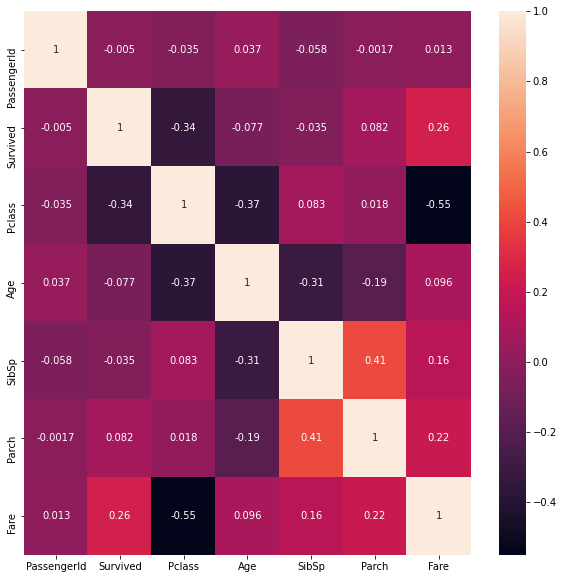

In [ ]:
#아직 가공되지 않은 데이터 상관분석
plt.figure(figsize=(10,10))
sns.heatmap(data=train_df.corr(), annot=True, fmt=".2g") #cmap=Blue, corr() :상관분석
plt.show()

In [ ]:
#--------------------------------------
# Target 피쳐 선정
# 1   Survived     891 non-null    int64
#--------------------------------------
X_train = train_df.drop("Survived", axis=1)  #학습용문제 : train 891
y_train = train_df["Survived"]               #학습용답안   : train용 답안지 891개, train 데이터에서 "Survived" 만 읽어라

In [ ]:
X_test = test_df                            #테스트용 문제지 : 892~1300?

In [ ]:
print(X_train[:2]) #1300여 건(문제), X를 가공할 것
print(y_train[:2]) #800여 건(답안)
print(X_test[:2])


   PassengerId  Pclass  ... Cabin Embarked
0            1       3  ...   NaN        S
1            2       1  ...   C85        C

[2 rows x 11 columns]
0    0.0
1    1.0
Name: Survived, dtype: float64
   PassengerId  Survived  Pclass  ...    Fare Cabin  Embarked
0          892       NaN       3  ...  7.8292   NaN         Q
1          893       NaN       3  ...  7.0000   NaN         S

[2 rows x 12 columns]


In [ ]:
#--------------------------------------
# Object 처리
#--------------------------------------
#  3   Name         891 non-null    object  --> Sex로 성별 구분 정도로 활용
#  4   Sex          891 non-null    object  --> lambda 이용해 female:0 , male:1 으로 변경
#  8   Ticket       891 non-null    object  --> 의미있는 데이터로 보기 어렵다고 판단
#  10  Cabin        204 non-null    object  --> 결측이 너무 많아 드롭(687건)
#  11  Embarked     889 non-null    object  -->

In [ ]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "female" else 1)

In [ ]:
df["Cabin2"] =  df["Cabin"].str[0:1]   #.str[0]

In [ ]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
df['Cabin2'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin2, dtype: object

In [ ]:
df["Name2"] = df["Name"].str.extract("([A-Za-z]+)\.")

In [ ]:
df['Name2'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name2, dtype: object

In [ ]:
dict = df.groupby(by=["Name2"])[["Name2","Age"]].mean().astype(np.int32).to_dict()
fill_mean_func = lambda gname: gname.fillna(dict['Age'][gname.name])
df = df.groupby('Name2').apply(fill_mean_func)

In [ ]:
# 나이 구간화   /  % //
df["Age_cate"] = df["Age"].apply(lambda x : int(x//10)) #데이터프레임 전체로 나이 구간화
df["Embarked"] = df["Embarked"].apply(lambda x: 1 if x == "C" else (2 if x == "Q" else 3))
df["SP"] = df["SibSp"] + df["Parch"]

In [ ]:
replace_col = ["SibSp", "Parch","Name","Name2","Age"]    #SP=SibSp+Parch     Age_cate<--Name,Name2,Age
del_col = ["Ticket","Cabin","Cabin2","Fare","Embarked"]  #Fare<--Pclass,SP   Embarked
replace_col = replace_col + del_col
df.drop(replace_col, axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age_cate     1309 non-null   int64  
 5   SP           1309 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.6 KB
None


In [ ]:
print("===========", df.head()) #가공 된 것을 확인

===========    PassengerId  Survived  Pclass  Sex  Age_cate  SP
0            1       0.0       3    1         2   1
0          892      32.0       3    1         3   0
1            2       1.0       1    0         3   1
1          893      36.0       3    0         4   1
2            3       1.0       3    0         2   0


In [ ]:
#가공된 train_df
train_df = df[df['PassengerId'] <= 891].copy() #행은 892까지, 열은 다 꺼내와
test_df = df[df['PassengerId'] > 891].copy() #행은 892부터 끝까지, 열은 다 꺼내와, 테스트용으로 차트 그리지 말기

In [ ]:
train_df.drop("PassengerId", axis=1, inplace=True)
test_df.drop("PassengerId", axis=1, inplace=True)

In [ ]:
X_train = train_df.drop("Survived", axis=1)  #학습용문제 : train 891
y_train = train_df["Survived"]               #학습용답안   : train용 답안지 891개, train 데이터에서 "Survived" 만 읽어라
X_test = test_df.drop("Survived", axis=1)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape)

(891, 4) (891,) (418, 4)


In [ ]:
print(X_train.head())

   Pclass  Sex  Age_cate  SP
0       3    1         2   1
1       1    0         3   1
2       3    0         2   0
3       1    0         3   1
4       3    1         3   0


In [ ]:
print(X_test.head())

   Pclass  Sex  Age_cate  SP
0       3    1         3   0
1       3    0         4   1
2       2    1         6   0
3       3    1         2   0
4       3    0         2   2


In [ ]:
print(y_train)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64


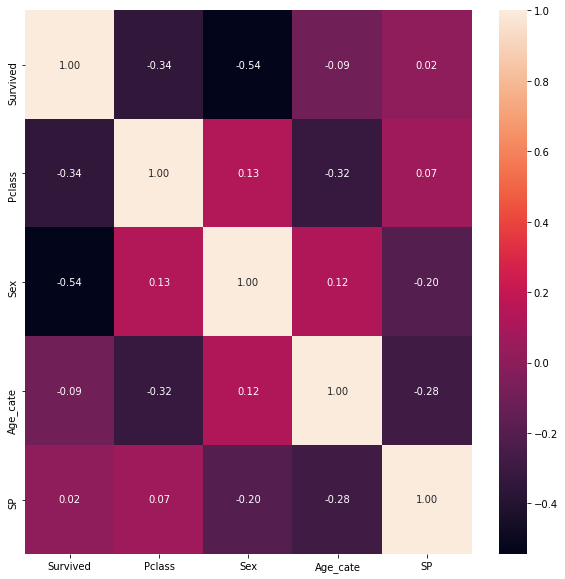

In [ ]:
#히트맵 그리기(데이터프레임 채로 그리면 안됨)
plt.figure(figsize=(10,10))
#sns.heatmap(data=X_train.corr(), annot=True, fmt=".2f") #cmap=Blue #가공 안된 데이터
sns.heatmap(data=train_df.corr(), annot=True, fmt=".2f") #cmap=Blue #가공 된 데이터 train으로 상관분석
#plt.show()

In [ ]:
# ??모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

In [ ]:
# fit : 학습하다
rf_model.fit(X_train, y_train)
# predict : 시험
y_pred = rf_model.predict(X_test).astype(np.int32)

In [ ]:
my_hyper_param = {  "n_estimators"     :[100, 300] ,
                    "max_depth"        :[3,5,7,9],
                    "min_samples_leaf" :[1,3,5],
                    "random_state"     :[121,]
                 }

In [ ]:
from sklearn.model_selection import GridSearchCV
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="accuracy", refit=True, cv=5, verbose=0)
#---- 이하 학습 동일 --------------------
# fit : 학습하다
gcv_model.fit(X_train, y_train)
# predict : 시험
print("best_estimator_", gcv_model.best_estimator_)
print("best_params_",    gcv_model.best_params_)
print("best_score_" ,    gcv_model.best_score_)
y_pred = gcv_model.predict(X_test).astype(np.int32)
print(y_pred)

best_estimator_ RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False)
best_params_ {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 121}
best_score_ 0.8294017952419811
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 

In [ ]:
sub_df = pd.read_csv("gender_submission.csv")
mydic = {"PassengerId": sub_df["PassengerId"],
         "Survived" : y_pred
         }
sub_df = pd.DataFrame(mydic, index=None)
#sub_df.set_index('PassengerId', inplace=True)
print(sub_df.head())
sub_df.to_csv("gender_submission22.csv", index=None)